<a href="https://colab.research.google.com/github/Luke-687/Chemotaxis-With-RL/blob/main/Hueristic_(Brownian_Motion_and_Custom_Gradient)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import matplotlib.pyplot as plt

In [ ]:
#s is for the steepness of the gradient
def defineScene(xS,yS, s):
  x = []
  y = []
  color = []
  gradient = []
  reward = []
  #Consider 20x20 grid, source of chemical at (15,15) with a decrease in alpha by r^2
  for i in range (0,xS+1):
    for j in range (0,yS+1):
      x.append(j)
      y.append(i)
      #distance based calculations:
      distance = math.sqrt((i-(xS/2))**2+(j-(yS/2))**2)
      if(distance <= 5):
        color.append("green")
        if(not distance<=1):
          gradient.append(1/(distance**s))
          reward.append(10/(distance**s))
        else:
          gradient.append(1)
          reward.append(50)
      else:
        color.append("green")
        gradient.append(0)
        reward.append(-50)
  return x, y, gradient, reward

def calculate_velocity(posX, posY, rewards):
  posX = int(posX)
  posY = int(posY)
  currentReward = rewards[posX+posY*20]
  if(currentReward<0):
    velocity = 4
  else:
    velocity = 1.25/currentReward
  return velocity

def calculate_direction(pastR, currentR, currentDirection):
  if(pastR<=currentR):
    if(pastR == 0):
      return (currentDirection+ random.randint(-90,90))
    if(abs(90/(currentR/pastR))>=90):
      return currentDirection + 90*(-1**random.randint(1,2))
    else:
      return currentDirection + 90/(currentR/pastR)*(-1**random.randint(1,2))
  else:
    return (currentDirection+ random.randint(90,270))

def simulate (alpha, gamma, xS, yS,steps, steep):
  #Define the initial parameters
  velocity = 7.5
  direction = random.randint(10,80)
  currentX = 0
  currentY= 0
  stepsToBeMade = steps
  xG, yG, gradient, reward = defineScene(xS, yS, steep)

  #Track x,y pos
  x=[]
  y=[]

  pastReward = 0
  for i in range(0, stepsToBeMade):
    #Enter and calculate reward of values which are about to be moved on from
    currentX = max(0, min(currentX, 19))
    currentY = max(0, min(currentY, 19))
    x.append(currentX)
    y.append(currentY)

    #Find new position, and new current reward
    brownian = brownianMotion()
    changeX = velocity * math.cos(direction*math.pi/180) + brownian[0]
    changeY = velocity * math.sin(direction*math.pi/180) + brownian[1]
    currentX = x[-1] + changeX
    currentY = y[-1] + changeY
    currentX = max(0, min(currentX, 19))
    currentY = max(0, min(currentY, 19))
    currentReward = pastReward + alpha*(reward[int(currentX+currentY*20)]+gamma*(reward[int(currentX+currentY*20)]-pastReward))

    #Redifine velocity and direction for next steps
    velocity = calculate_velocity(int(currentX), int(currentY), reward)
    direction = calculate_direction(pastReward, currentReward, direction)
    pastReward = currentReward
  return x,y

def brownianMotion():
  result = [0,0]
  xChange = random.random()/4
  yChange = random.random()/4
  for i in range(10):
    xChange+= random.random()/100 * (-1**(random.randint(1,2)))
    yChange+= random.random()/100 * (-1**(random.randint(1,2)))
  result = [xChange, yChange]
  return result

In [ ]:
#Key values which can be alterred
alpha = 0.99
gamma = 0.88
steepness = 0.75

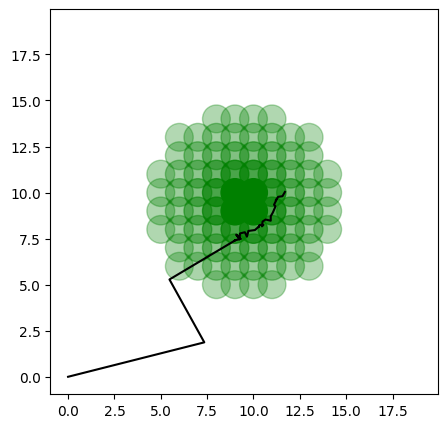

In [ ]:
plt.figure(figsize=(5, 5))

#AWB = Agent With Brownian || Define agent results and graph path
xAWB, yAWB = simulate(alpha, gamma, 19, 19, 30, steepness)
plt.plot(xAWB, yAWB, c = "black")

#Define gradient field and plot it
xG, yG, alphaG, reward = defineScene(19,19,steepness)
plt.scatter(xG, yG, c = "green", s=400, alpha = alphaG)

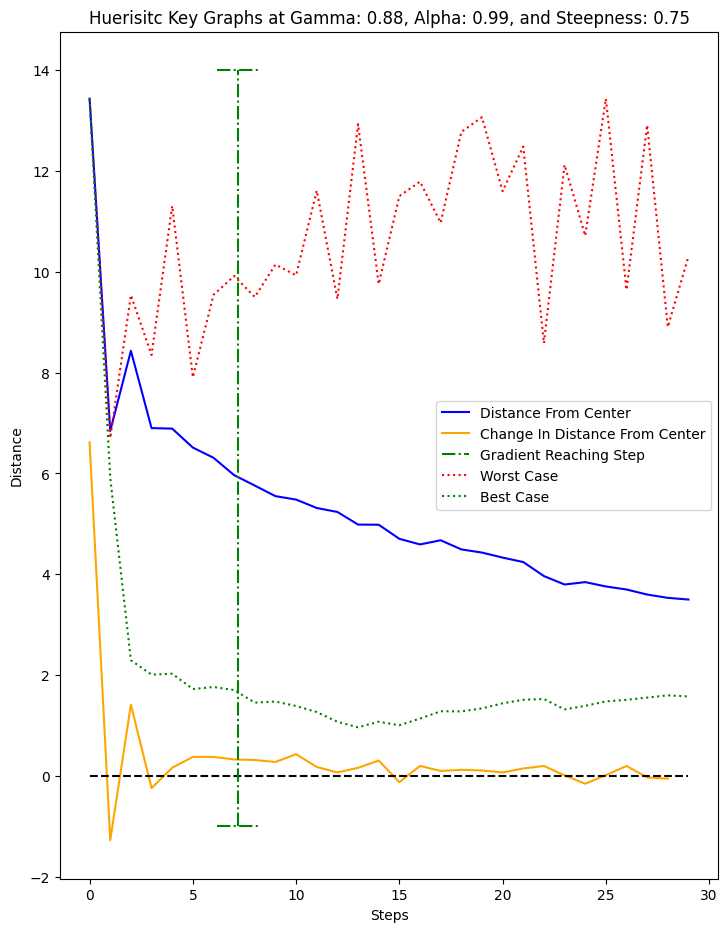

In [ ]:
# Functions created to track the avg distance from center over 100 runs, avg change of distance from center over 100 runs, avg step to center over 100 runs, and the best and worst cases

#Graph the avg distance from center for 30 steps over 100 runs
stepsAvgDist = []
avgDist = []
for i in range(30):
  stepsAvgDist.append(i)
  avgDist.append(0)
for run in range(100):
  xTemp, yTemp = simulate(alpha, gamma, 19,19,30,steepness)
  for step in range(len(xTemp)):
    distance = math.sqrt((xTemp[step]-9.5)**2+(yTemp[step]-9.5)**2)
    avgDist[step]+=distance/100

#Graph the avg change in distance from center for stpes 2-30 over 100 runs
stepsAvgDistChange = []
avgDistChange = []
for i in range(29):
  stepsAvgDistChange.append(i)
  avgDistChange.append(0)
for run in range(100):
  xTemp, yTemp = simulate(alpha,gamma, 19,19,30,steepness)
  initDist = math.sqrt((xTemp[0]-9.5)**2+(yTemp[0]-9.5)**2)
  for step in range(1, len(xTemp)):
    newDist = math.sqrt((xTemp[step]-9.5)**2+(yTemp[step]-9.5)**2)
    avgDistChange[step-1] += (initDist-newDist)/100
    initDist = newDist

#Define the avg step where the agent reaches the center over 100 runs
avgStep = 0
for run in range(100):
  xTemp, yTemp = simulate(alpha, gamma, 19, 19,30,steepness)
  for step in range(len(xTemp)):
    distance = math.sqrt((xTemp[step]-9.5)**2+(yTemp[step]-9.5)**2)
    if(distance<=5):
      avgStep += step/100
      break

#Define the plots for the best and worst out of 100 runs, returning the paths of each
steps = []
for i in range(30):
  steps.append(i)
distBest = []
distWorst = []

minDist = 100000
maxDist = 0
for run in range(100):
  xTemp, yTemp = simulate(alpha, gamma, 19, 19,30, steepness)
  totalDist = 0
  for step in range(len(xTemp)):
    totalDist+= math.sqrt((xTemp[step]-9.5)**2+(yTemp[step]-9.5)**2)
  if(totalDist>maxDist):
    maxDist = totalDist
    distWorst.clear()
    for i in range(len(xTemp)):
      distWorst.append(math.sqrt((xTemp[i]-9.5)**2+(yTemp[i]-9.5)**2))
  if(totalDist<minDist):
    minDist = totalDist
    distBest.clear()
    for i in range(len(xTemp)):
      distBest.append(math.sqrt((xTemp[i]-9.5)**2+(yTemp[i]-9.5)**2))

plt.figure(figsize=(8.5, 11))

plt.plot(stepsAvgDist, avgDist, c = "blue", label = "Distance From Center")

plt.plot(stepsAvgDistChange, avgDistChange, c = "orange", label="Change In Distance From Center")

plt.plot([0,29], [0,0], c = "black", linestyle = "dashed")

plt.plot([avgStep, avgStep], [-1,14], linestyle = "dashdot", color = "green", label = "Gradient Reaching Step")
plt.plot([avgStep-1,avgStep+1], [-1,-1], linestyle = "dashdot", color = "green")
plt.plot([avgStep-1,avgStep+1], [14,14], linestyle = "dashdot", color = "green")

plt.plot(steps, distWorst, color = "red", linestyle = "dotted", label = "Worst Case")
plt.plot(steps, distBest, color = "green", linestyle = "dotted", label = "Best Case")

plt.xlabel("Steps")
plt.ylabel("Distance")
plt.title("Huerisitc Key Graphs at Gamma: " + str(gamma) + ", Alpha: " + str(alpha)+", and Steepness: " + str(steepness)  )
plt.legend()